In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib

In [2]:
path = '/home/philipp/Documents/results/union_gt_deeplab.shp'
data = gpd.read_file(path)

In [3]:
data['errors'] = 0

In [8]:
data.loc[data['typ'] == data['DF'], 'errors'] = 1
data.loc[(data['typ'] == 1) & (data['DF'] != 1), 'errors'] = 2 # FN
data.loc[(data['typ'] != 1) & (data['DF'] == 1), 'errors'] = 3 # FP

In [9]:
data

,fb,fr,abt,uabt,teilfl,admin,length,area,fly_date,year_fly,...,fly_d,cut_ma,cut_v_lh,cut_v_nh,cut_v_nan,cut_v_tot,typ,DF,geometry,errors
0,177.0,6.0,144.0,A,2.0,609.0,1180.373535,24672.718591,26.06.2019,2019.0,...,26.0,None,0.0,0.0,0.0,0.0,2.0,2.0,"POLYGON ((448309.981 360969.639, 448303.600 36...",1
1,177.0,6.0,1.0,3,1.0,609.0,3286.208496,16713.772903,03.07.2018,2018.0,...,3.0,None,0.0,0.0,0.0,0.0,3.0,0.0,"POLYGON ((444250.867 360818.550, 444251.981 36...",0
2,177.0,6.0,1.0,3,1.0,609.0,3286.208496,16713.772903,03.07.2018,2018.0,...,3.0,None,0.0,0.0,0.0,0.0,3.0,2.0,"POLYGON ((444186.581 360806.361, 444186.680 36...",0
3,177.0,6.0,1.0,3,1.0,609.0,3286.208496,16713.772903,03.07.2018,2018.0,...,3.0,None,0.0,0.0,0.0,0.0,3.0,1.0,"MULTIPOLYGON (((444182.381 360806.091, 444185....",3
4,177.0,6.0,1.0,3,1.0,609.0,3286.208496,16713.772903,03.07.2018,2018.0,...,3.0,None,0.0,0.0,0.0,0.0,3.0,2.0,"POLYGON ((444057.781 360799.694, 444059.381 36...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87714,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,1.0,"POLYGON ((436070.981 367416.950, 436071.981 36...",3
87715,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,2.0,"POLYGON ((436322.781 367419.350, 436323.781 36...",0
87716,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,2.0,"POLYGON ((436299.381 367408.950, 436299.581 36...",0
87717,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,2.0,"POLYGON ((436311.581 367408.750, 436311.781 36...",0


In [2]:
# save to file
path = '/home/philipp/Documents/results/errors_deeplab.shp'
#data.to_file("/home/philipp/Documents/results/errors_deeplab.shp")
data = gpd.read_file(path)

In [3]:
data_t = data[data['errors'] == 1]
data_fn = data[data['errors'] == 2]
data_fp = data[data['errors'] == 3]

In [4]:
print(data_t['age'].describe())
print(data_fn['age'].describe())
print(data_fp['age'].describe())

count    22984.000000
mean        64.793117
std         53.739663
min          1.000000
25%         26.000000
50%         51.000000
75%         90.000000
max        271.000000
Name: age, dtype: float64
count    14025.000000
mean        57.494688
std         22.767009
min         11.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        231.000000
Name: age, dtype: float64
count    23946.000000
mean        71.169047
std         67.835106
min          1.000000
25%         11.000000
50%         46.000000
75%        126.000000
max        267.000000
Name: age, dtype: float64


In [3]:
data['age_mass'] = data['mass_ha']/data['age']

In [4]:
data.columns

Index(['fb', 'fr', 'abt', 'uabt', 'teilfl', 'admin', 'length', 'area',
       'fly_date', 'year_fly', 'WO', 'fb_sap', 'fr_sap', 'abt_sap', 'uabt_sap',
       'teilfl_sap', 'start_term', 'uz', 'non_forest', 'economy', 'ww_sw',
       'sw_type', 'sea_level', 'exp', 'slope', 'site_type', 'veg_type',
       'growth_are', 'age', 'BL', 'FI', 'LH', 'NH', 'LA', 'KI', 'DG', 'SK',
       'mass_ha', 'mass_ha_lh', 'mass_ha_nh', 'mass_tot', 'mass_tot_l',
       'mass_tot_n', 'cut_area', 'cut_lh', 'cut_nh', 'cut_sum', 'dr', 'bp',
       'zp', 'ru', 'sg', 'ma', 'year_fe', 'age_diff', 'fly_y', 'fly_m',
       'fly_d', 'cut_ma', 'cut_v_lh', 'cut_v_nh', 'cut_v_nan', 'cut_v_tot',
       'typ', 'DF', 'errors', 'geometry', 'age_mass'],
      dtype='object')

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

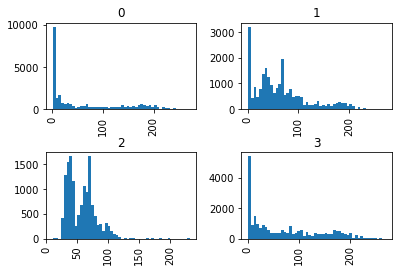

In [5]:
data.hist(column='age', by='errors', bins=50)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

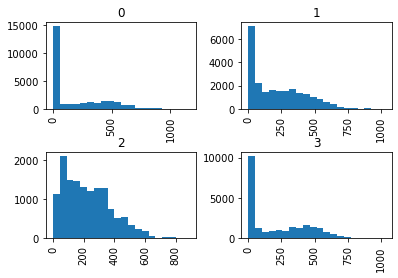

In [6]:
data.hist(column='mass_ha', by='errors', bins=20)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

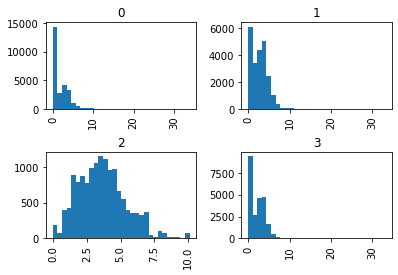

In [7]:
data.hist(column='age_mass', by='errors', bins=30)

In [8]:
data['flag'] = 0

data.loc[(data['age']<11) & (data['errors']==1), 'flag'] = 1
data.loc[(data['age']<11) & (data['errors']==2), 'flag'] = 2
data.loc[(data['age']<11) & (data['errors']==3), 'flag'] = 3

data.loc[(data['age']>100) & (data['errors']==1), 'flag'] = 10
data.loc[(data['age']>100) & (data['errors']==2), 'flag'] = 20
data.loc[(data['age']>100) & (data['errors']==3), 'flag'] = 30

In [13]:
data.loc[0,'geometry'].area 

14.776148560409627

In [14]:
data.loc[data.loc[:,'geometry'].area<200, 'flag'] = 0

In [15]:
# save to file
path = '/home/philipp/Documents/results/errors_deeplab.shp'
data.to_file(path)

In [ ]:
data.pivot_table(values='X', rows='Y', cols='Z', aggfunc=lambda x: len(x.unique())